In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.impute
from sklearn import impute
from sklearn.impute import SimpleImputer

# 1 Numerical input, numerical output — Pearson’s with f_regression()

In [64]:
df = pd.read_csv(r'C:\Users\masud\Documents\Steel-Project\Final_csv.csv')
df.head()

,Unnamed: 0,coil,furnace Number,analyse,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,...,al,ma,b,n,ti,cr,va,mo,difference,constriction
0,0,396378,1,K371,10003,101,1302.1,1147,921,4.36,...,304,291,1,34,6,302,0,25,-0.783333,0
1,1,396376,3,K371,10123,101,1282.3,1150,920,4.37,...,395,384,1,33,12,189,25,7,-0.300000,0
2,2,396377,4,K321,10040,102,1297.4,1183,933,4.43,...,476,463,1,20,11,288,0,40,-1.866667,0
3,3,396379,3,K371,10243,102,1295.2,1165,910,4.44,...,306,296,1,21,9,253,0,9,-0.166667,0
4,4,396380,4,K321,10012,100,1293.3,1192,909,3.95,...,340,329,1,28,8,297,0,23,-0.800000,0


In [65]:
df = df.drop(['Unnamed: 0','Thickness profile'], axis = 1)

In [66]:
df.columns

Index(['coil', 'furnace Number', 'analyse', 'Hardness_1', 'Hardness_2',
       'Width', 'Temperature before finishing mill',
       'Temperature after finishing mill', 'Thickness', 'c', 'mn', 'si', 'nb',
       'p', 's', 'al', 'ma', 'b', 'n', 'ti', 'cr', 'va', 'mo', 'difference',
       'constriction'],
      dtype='object')

In [79]:
#Extracting independent variable
X= df.iloc[:,5:-2].values 

#Extracting dependent variable
y= df.iloc[:,-1].values


In [85]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import pandas as pd

#feature selection using f_regression 
fs = SelectKBest(score_func=f_regression, k=5)
fit = fs.fit(X,y)

#create df for scores
dfscores = pd.DataFrame(fit.scores_)
#create df for column names
dfcolumns = pd.DataFrame(df.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Selected_columns','Score_pearsons'] 

#print 10 best features
print(featureScores.nlargest(16,'Score_pearsons'))  

                     Selected_columns  Score_pearsons
5                               Width     5971.909929
15                                 al     5339.970998
6   Temperature before finishing mill     4537.377787
17                                  b     3048.393578
16                                 ma     2962.971204
12                                 nb     2787.077174
4                          Hardness_2     2523.645734
9                                   c     1914.586340
3                          Hardness_1     1831.074540
7    Temperature after finishing mill      777.142579
11                                 si      775.390674
10                                 mn      753.261567
13                                  p      348.473684
0                                coil      186.857807
2                             analyse       54.873773
8                           Thickness       28.560700


# Feature Feature importance based on mean decrease in impurity

In [ ]:
df = pd.read_csv(r'C:\Users\masud\Documents\Steel-Project\Final_csv.csv')
df.head()

In [ ]:
df = df.drop(['Unnamed: 0','Thickness profile'], axis = 1)

In [67]:
#Extracting independent variable
X= df.iloc[:,5:-2].values 


In [68]:
X

array([[1302.1, 1147. ,  921. , ...,  302. ,    0. ,   25. ],
       [1282.3, 1150. ,  920. , ...,  189. ,   25. ,    7. ],
       [1297.4, 1183. ,  933. , ...,  288. ,    0. ,   40. ],
       ...,
       [1257.2, 1182. ,  919. , ...,  248. ,    0. ,   36. ],
       [1257.1, 1194. ,  923. , ...,  248. ,    0. ,   36. ],
       [1258. , 1178. ,  918. , ...,  248. ,    0. ,   36. ]])

In [69]:
#Extracting dependent variable
y= df.iloc[:,-1].values 

In [70]:
#splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [71]:
#Standardizing datasets

from sklearn.preprocessing import StandardScaler

st_x= StandardScaler()  
x_train= st_x.fit_transform(X_train)  

In [72]:
#Standardizing datasets

X_test= st_x.transform(X_test)

In [73]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [74]:
import time
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.031 seconds


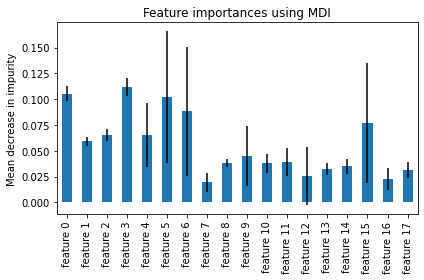

In [75]:
#ploting the impurity-based impoertance

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
